In [13]:
import pandas as pd
# import numpy as np
from pandas import DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

#### Read dataset from file

In [14]:
master: DataFrame = pd.read_csv('./data/master.csv')
print(master.shape)

(344667, 15)


#### Exploring field values summary

In [15]:
print(master.describe().T)

                 count           mean           std        min           25%  \
Weekly_Sales  344667.0   16011.033071  22859.611439  -4988.940   2100.335000   
Temperature   344667.0      57.391070     18.644742     -2.060     43.820000   
Fuel_Price    344667.0       3.278793      0.454502      2.472      2.843000   
MarkDown1      74187.0    7377.990937   9695.184239      0.500   1842.420000   
MarkDown2      66068.0    5520.011830  11806.737391   -265.760     96.520000   
MarkDown3      68659.0    2812.494829  13457.720905     -1.000      5.900000   
MarkDown4      66394.0    3867.350763   8176.212908      0.460    319.840000   
MarkDown5      74529.0    4841.675275   5046.201077    135.160   1844.030000   
CPI           344667.0     170.260421     38.767201    126.064    131.940807   
Unemployment  344667.0       8.119909      1.865077      4.125      7.082000   
Size          344667.0  136807.198011  60944.571069  34875.000  93638.000000   

                        50%            

#### Exploring field types

In [16]:
print(master.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344667 entries, 0 to 344666
Data columns (total 15 columns):
Store_Dept      344667 non-null object
Date            344667 non-null object
Weekly_Sales    344667 non-null float64
IsHoliday       344667 non-null bool
Temperature     344667 non-null float64
Fuel_Price      344667 non-null float64
MarkDown1       74187 non-null float64
MarkDown2       66068 non-null float64
MarkDown3       68659 non-null float64
MarkDown4       66394 non-null float64
MarkDown5       74529 non-null float64
CPI             344667 non-null float64
Unemployment    344667 non-null float64
Type            344667 non-null object
Size            344667 non-null int64
dtypes: bool(1), float64(10), int64(1), object(3)
memory usage: 33.2+ MB
None


#### Exploring field correlation

In [17]:
print(master.corr())

              Weekly_Sales  IsHoliday  Temperature  Fuel_Price  MarkDown1  \
Weekly_Sales      1.000000   0.014033    -0.002499    0.002062   0.057833   
IsHoliday         0.014033   1.000000    -0.168885   -0.074035  -0.077953   
Temperature      -0.002499  -0.168885     1.000000    0.057290  -0.099513   
Fuel_Price        0.002062  -0.074035     0.057290    1.000000   0.069270   
MarkDown1         0.057833  -0.077953    -0.099513    0.069270   1.000000   
MarkDown2         0.033304   0.358563    -0.211968   -0.214492   0.041786   
MarkDown3         0.078896   0.487070     0.010172   -0.086221  -0.133596   
MarkDown4         0.024924  -0.003105    -0.125322   -0.005782   0.864866   
MarkDown5         0.101243  -0.096215    -0.042591   -0.114328   0.230008   
CPI              -0.020811   0.001065     0.179387   -0.160191  -0.050044   
Unemployment     -0.024294   0.000057     0.168046    0.001050   0.021584   
Size              0.242486   0.000459    -0.057018    0.007537   0.286096   

#### Exploring null values

In [18]:
print(master.isna().sum())


Store_Dept           0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270480
MarkDown2       278599
MarkDown3       276008
MarkDown4       278273
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64


#### Plot distribution

In [19]:
sns.set()

##### Plot distribution of categorical variables
###### IsHoliday, Type

In [20]:
type_dist = master['Type'].value_counts()
type_dist_df = pd.DataFrame({'type': type_dist.index, 'count': type_dist.values})

holiday_dist = master['IsHoliday'].value_counts()
holiday_dist_df = pd.DataFrame({'holiday': holiday_dist.index, 'count': holiday_dist.values})

Text(0.5, 1.0, 'Holiday')

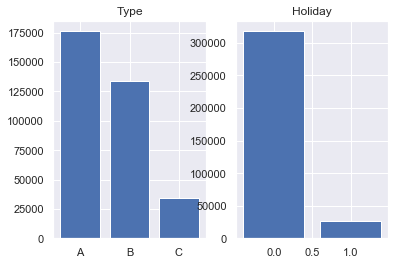

In [21]:
fig1, axs = plt.subplots(1, 2)
axs[0].bar(type_dist_df['type'], type_dist_df['count'])
axs[0].set_title('Type')
axs[1].bar(holiday_dist_df['holiday'], holiday_dist_df['count'])
axs[1].set_title('Holiday')

sns.catplot(x='Type', y='Size', kind='box', data=master)

##### Distribution of continuous variables
###### Temperature, Fuel_Price, CPI, Unemployment, Size

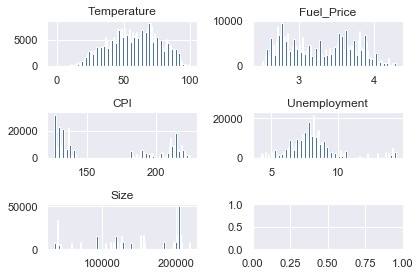

In [22]:
cols_2d = [['Temperature', 'Fuel_Price'], ['CPI', 'Unemployment'], ['Size']]
fig3, axs = plt.subplots(3, 2, tight_layout=True)
for i, cols_1d in enumerate(cols_2d):
    for j, col in enumerate(cols_1d):
        axs[i, j].hist(master[col], bins=100)
        axs[i, j].set_title(col)

###### MarkDown1-MarkDown5

C:\Users\balav\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\balav\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


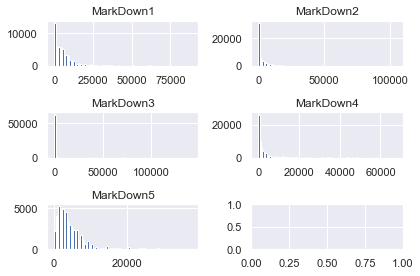

In [25]:
cols_2d = [['MarkDown1', 'MarkDown2'], ['MarkDown3', 'MarkDown4'], ['MarkDown5']]
fig3, axs = plt.subplots(3, 2, tight_layout=True)
for i, cols_1d in enumerate(cols_2d):
    for j, col in enumerate(cols_1d):
        axs[i, j].hist(master[col], bins=100)
        axs[i, j].set_title(col)
